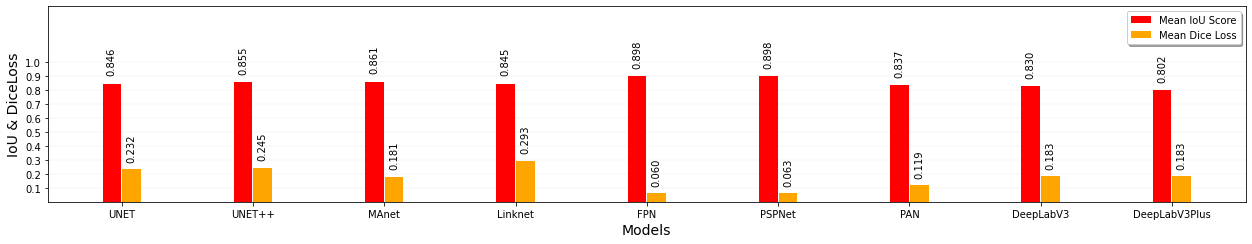

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def main():
	#### 1. bar plot으로 나타낼 데이터 입력
	models = ['Mean IoU Score', 'Mean Dice Loss']
	xticks = ['UNET', 'UNET++', 'MAnet','Linknet', 'FPN', 'PSPNet','PAN', 'DeepLabV3', 'DeepLabV3Plus']
	data = {'Mean IoU Score':[0.8457, 0.8552, 0.8605,0.8454,0.8984,0.8979,0.8366,0.8299,0.8019],
	        'Mean Dice Loss':[0.2323, 0.2450, 0.1806,0.2927,0.0596,0.0630,0.1195,0.1832,0.1831]}
	
	#### 2. matplotlib의 figure 및 axis 설정
	fig, ax = plt.subplots(1,1,figsize=(17.5,3.5)) # 1x1 figure matrix 생성, 가로(7인치)x세로(5인치) 크기지정
	colors = ['red', 'orange',]
	width = 0.15
	
	#### 3. bar 그리기
	for i, model in enumerate(models):
		pos = compute_pos(xticks, width, i, models)
		bar = ax.bar(pos, data[model], width=width*0.95, label=model, color=colors[i])
		present_height(ax, bar) # bar높이 출력
	
	#### 4. x축 세부설정
	ax.set_xticks(range(len(xticks)))
	ax.set_xticklabels(xticks, fontsize=10)	
	ax.set_xlabel('Models', fontsize=14)
	
	#### 5. y축 세부설정
	ax.set_ylim([0.0,1.4])
	ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.80,0.90,1.0])
	ax.yaxis.set_tick_params(labelsize=10)
	ax.set_ylabel('IoU & DiceLoss', fontsize=14)
	
	#### 6. 범례 나타내기
	ax.legend(loc='upper right', shadow=True, ncol=1)
	
	#### 7. 보조선(눈금선) 나타내기
	ax.set_axisbelow(True)
	ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.1)
	
	#### 8. 그래프 저장하고 출력하기
	plt.tight_layout()
	plt.savefig('ex_barplot.png', format='png', dpi=300)
	plt.show()
	
def compute_pos(xticks, width, i, models):
    index = np.arange(len(xticks))
    n = len(models)
    correction = i-0.5*(n-1)
    return index + width*correction

def present_height(ax, bar):
	for rect in bar:
		height = rect.get_height()
		posx = rect.get_x()+rect.get_width()*0.5
		posy = height*1.01+0.05
		ax.text(posx, posy, '%.3f' % height, rotation=90, ha='center', va='bottom')
		
if __name__=='__main__':
	main()